In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.feature_bagging import FeatureBagging

from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM, SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

from matplotlib import pyplot as plt

/mnt/c/Users/jaime.tenorio/Documents/projects/LookTests/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train_known = pd.read_csv("train.csv")
test_known = pd.read_csv("test_known.csv")

unknown = pd.read_csv("test_unknown.csv")
train_unknown, test_unknown = train_test_split(unknown, test_size=0.8, random_state=42)

In [3]:
X_train_known, Y_train_known = train_known.drop(["class"], axis=1).values, train_known["class"].values
X_train_unknown, Y_train_unknown = train_unknown.drop(["class"], axis=1).values, train_unknown["class"].values

X_test_known, Y_test_known = test_known.drop(["class"], axis=1).values, test_known["class"].values
X_test_unknown, Y_test_unknown = test_unknown.drop(["class"], axis=1).values, test_unknown["class"].values

contamination = len(X_train_unknown)/(len(X_train_unknown) + len(X_train_known))

In [4]:
def plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies):
    plt.plot(parameter_range, inlier_accuracies, 'r')
    plt.plot(parameter_range, outlier_accuracies, 'b')
    plt.grid()
    plt.show()
    
def plot_classification(parameter_range, scores):
    plt.plot(parameter_range, scores)
    plt.gca().legend(("precision", "recall", "fscore", "support"))
    plt.grid()
    plt.show()

# Outlier Detection

### K-Nearest Neighbors

In [5]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = range(2, 36)

for k in parameter_range:
    clf = KNN(
        contamination=contamination,
        n_neighbors=k
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)

    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 0].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == 1].size/outlier_predict_unknown.size)

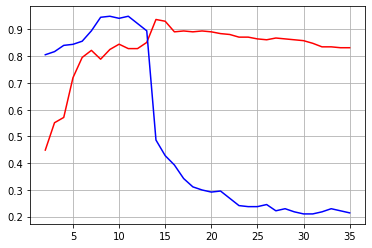

In [6]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

### Histogram-Based Outlier Detection

In [7]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = range(2, 20)

for k in parameter_range:
    clf = HBOS(
        contamination=contamination,
        n_bins=k
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)
    
    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 0].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == 1].size/outlier_predict_unknown.size)

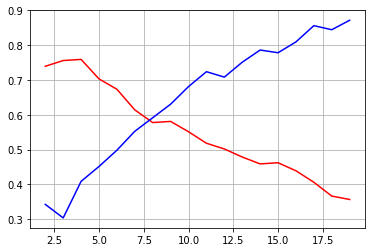

In [8]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

### Feature Bagging

In [9]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = range(2, 40)

for k in parameter_range:
    clf = FeatureBagging(
        LOF(n_neighbors=k),
        contamination=contamination,
        check_estimator=False,
        random_state=42
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)
    
    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 0].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == 1].size/outlier_predict_unknown.size)

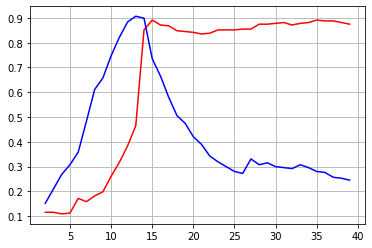

In [10]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

### Isolation Forest

In [11]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = np.linspace(1, 1000, 20, dtype=int)

for k in parameter_range:
    clf = IsolationForest(
        n_estimators=k,
        contamination=contamination,
        random_state=42
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)
    
    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 1].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == -1].size/outlier_predict_unknown.size)

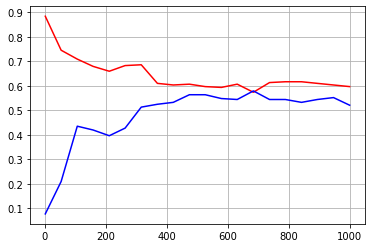

In [12]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

### One Class SVM

In [13]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = np.logspace(-10, 0, 20)

for k in parameter_range:
    clf = OneClassSVM(
        gamma=k
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)
    
    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 1].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == -1].size/outlier_predict_unknown.size)

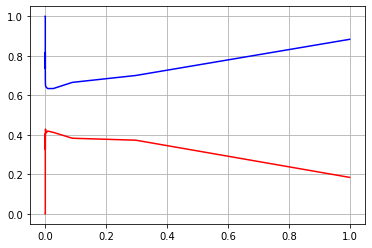

In [14]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

### Local Outlier Factor

In [15]:
inlier_accuracies = []
outlier_accuracies = []

parameter_range = range(2, 30)

for k in parameter_range:
    clf = LocalOutlierFactor(
        n_neighbors=k,
        novelty=True,
        contamination=contamination
    )
    clf.fit(np.vstack((X_train_known, X_train_unknown)))
    
    outlier_predict_known = clf.predict(X_test_known)
    outlier_predict_unknown = clf.predict(X_test_unknown)
    
    inlier_accuracies.append(outlier_predict_known[outlier_predict_known == 1].size/outlier_predict_known.size)
    outlier_accuracies.append(outlier_predict_unknown[outlier_predict_unknown == -1].size/outlier_predict_unknown.size)

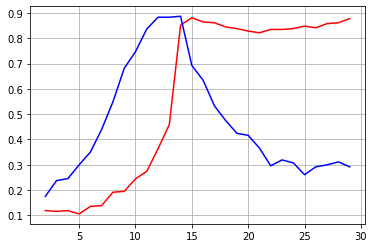

In [16]:
plot_outlier_detection(parameter_range, inlier_accuracies, outlier_accuracies)

# Classification

### K-Nearest Neighbors

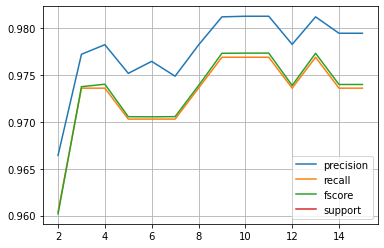

In [17]:
scores = []
parameter_range = range(2, 16)

for k in parameter_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_known, Y_train_known)
    Y_pred_known = clf.predict(X_test_known)
    scores.append(precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted"))
    
plot_classification(parameter_range, scores)

### Decision Tree

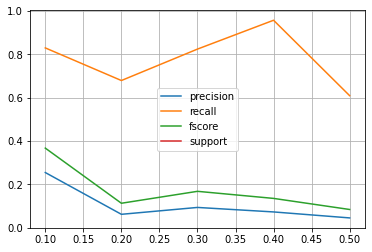

In [18]:
scores = []
parameter_range = np.linspace(0.1, 0.5, 5, endpoint=True)

for k in parameter_range:
    clf = DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=k
    )
    clf.fit(X_train_known, Y_train_known)
    Y_pred_known = clf.predict(X_test_known)
    scores.append(precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted", labels=np.unique(Y_pred_known)))
    
plot_classification(parameter_range, scores)

### Random Forest

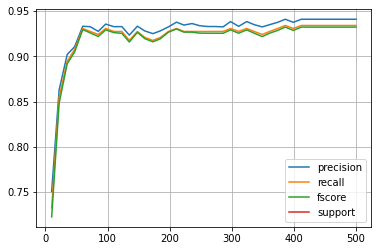

In [19]:
scores = []
parameter_range = np.linspace(10, 500, 40, endpoint=True, dtype=int)

for k in parameter_range:
    clf = RandomForestClassifier(
        random_state=42,
        n_estimators=k
    )
    clf.fit(X_train_known, Y_train_known)
    Y_pred_known = clf.predict(X_test_known)
    scores.append(precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted", labels=np.unique(Y_pred_known)))
    
plot_classification(parameter_range, scores)

### AdaBoost

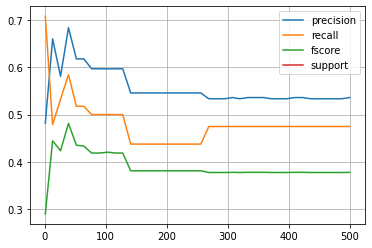

In [20]:
scores = []
parameter_range = np.linspace(1, 500, 40, endpoint=True, dtype=int)

for k in parameter_range:
    clf = AdaBoostClassifier(
        random_state=42,
        n_estimators=k
    )
    clf.fit(X_train_known, Y_train_known)
    Y_pred_known = clf.predict(X_test_known)
    scores.append(precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted", labels=np.unique(Y_pred_known)))
    
plot_classification(parameter_range, scores)

### Linear SVC

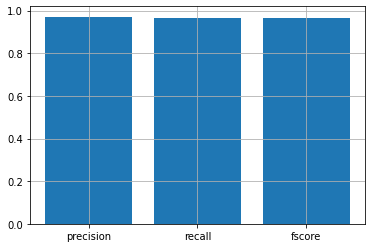

In [21]:
clf = SVC(
    kernel="linear"
)
clf.fit(X_train_known, Y_train_known)
Y_pred_known = clf.predict(X_test_known)
(p, r, f, s) = precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted", labels=np.unique(Y_pred_known))
    
plt.bar(("precision", "recall", "fscore"), (p, r, f))
plt.grid()
plt.show()

### RBF SVC

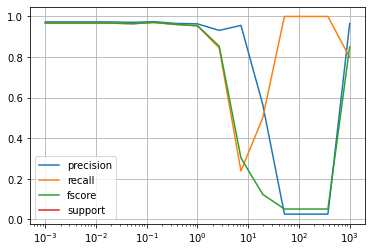

In [22]:
scores = []
parameter_range = np.logspace(-3, 3, 15)

for k in parameter_range:
    clf =  SVC(
        kernel="rbf",
        gamma=k
    )
    clf.fit(X_train_known, Y_train_known)
    Y_pred_known = clf.predict(X_test_known)
    scores.append(precision_recall_fscore_support(Y_test_known, Y_pred_known, average="weighted", labels=np.unique(Y_pred_known)))

plt.xscale("log")
plot_classification(parameter_range, scores)

# Pipeline

### LOF + RBF SVC

In [23]:
outlier_detector = LocalOutlierFactor(
    n_neighbors=14,
    novelty=True,
    contamination=contamination
)
outlier_detector.fit(np.vstack((X_train_known, X_train_unknown)))

classifier = SVC(
    kernel="rbf",
    gamma=0.1
)
classifier.fit(X_train_known, Y_train_known)

def pipeline(embeddings):
    predictions = np.asarray([None]*len(embeddings))

    outlier_prediction = outlier_detector.predict(embeddings)
    predictions[np.where(outlier_prediction == -1)] = -1

    classifier_prediction = classifier.predict(embeddings)
    predictions[np.where(outlier_prediction == 1)] = classifier_prediction[np.where(outlier_prediction == 1)]

    predictions = np.asarray(predictions, dtype=int)
    return predictions

In [24]:
X_test = np.vstack((X_test_known, X_test_unknown))
Y_test = np.hstack((Y_test_known, Y_test_unknown))

predictions = pipeline(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          -1       0.84      0.89      0.86       257
           0       0.85      0.85      0.85        13
           1       0.83      1.00      0.91        10
           2       0.93      1.00      0.97        14
           3       0.88      0.70      0.78        10
           4       1.00      0.75      0.86         8
           5       0.89      0.80      0.84        10
           6       1.00      0.75      0.86         8
           7       0.80      0.73      0.76        11
           8       1.00      0.50      0.67        10
           9       0.90      1.00      0.95         9
          10       0.89      0.89      0.89         9
          11       0.83      1.00      0.91        10
          12       1.00      1.00      1.00        12
          13       0.64      0.93      0.76        15
          14       0.93      1.00      0.96        13
          15       1.00      0.33      0.50        12
          16       1.00    

### Feature Bagging + Random Forest

In [27]:
outlier_detector = FeatureBagging(
    LOF(n_neighbors=14),
    contamination=contamination,
    check_estimator=False,
    random_state=42
)
outlier_detector.fit(np.vstack((X_train_known, X_train_unknown)))

classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=500
)
classifier.fit(X_train_known, Y_train_known)

def pipeline(embeddings):
    predictions = np.asarray([None]*len(embeddings))

    outlier_prediction = outlier_detector.predict(embeddings)
    predictions[np.where(outlier_prediction == 1)] = -1

    classifier_prediction = classifier.predict(embeddings)
    predictions[np.where(outlier_prediction == 0)] = classifier_prediction[np.where(outlier_prediction == 0)]

    predictions = np.asarray(predictions, dtype=int)
    return predictions

In [28]:
X_test = np.vstack((X_test_known, X_test_unknown))
Y_test = np.hstack((Y_test_known, Y_test_unknown))

predictions = pipeline(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          -1       0.84      0.90      0.87       257
           0       1.00      0.77      0.87        13
           1       0.77      1.00      0.87        10
           2       1.00      1.00      1.00        14
           3       0.88      0.70      0.78        10
           4       1.00      0.62      0.77         8
           5       0.89      0.80      0.84        10
           6       1.00      0.75      0.86         8
           7       0.88      0.64      0.74        11
           8       1.00      0.60      0.75        10
           9       1.00      1.00      1.00         9
          10       0.67      0.89      0.76         9
          11       0.83      1.00      0.91        10
          12       0.86      1.00      0.92        12
          13       0.65      0.87      0.74        15
          14       1.00      1.00      1.00        13
          15       1.00      0.33      0.50        12
          16       1.00    